In [1]:
import pandas as pd
import numpy as np
import ydata_profiling
from statsmodels.formula.api import ols
from statsmodels.formula.api import logit,mnlogit
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
df= pd.read_csv('forecasting_case_study.csv')

In [3]:
df.head()

,Product,date,Sales,Price Discount (%),In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,V_DAY,EASTER,CHRISTMAS
0,SKU1,2/5/2017,27750,0%,0,0,0,0.0,0,0,0,0
1,SKU1,2/12/2017,29023,0%,1,0,1,0.0,0,1,0,0
2,SKU1,2/19/2017,45630,17%,0,0,0,0.0,0,0,0,0
3,SKU1,2/26/2017,26789,0%,1,0,1,0.0,0,0,0,0
4,SKU1,3/5/2017,41999,17%,0,0,0,0.0,0,0,0,0


In [4]:
profile= df.profile_report(title='Retail Forcasting', explorative=True)

In [5]:
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Product             1218 non-null   object 
 1   date                1218 non-null   object 
 2   Sales               1218 non-null   int64  
 3   Price Discount (%)  1218 non-null   object 
 4   In-Store Promo      1218 non-null   int64  
 5   Catalogue Promo     1218 non-null   int64  
 6   Store End Promo     1218 non-null   int64  
 7   Google_Mobility     1218 non-null   float64
 8   Covid_Flag          1218 non-null   int64  
 9   V_DAY               1218 non-null   int64  
 10  EASTER              1218 non-null   int64  
 11  CHRISTMAS           1218 non-null   int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 114.3+ KB


In [7]:
def date_clean(df):
    df["date"] =  pd.to_datetime(df["date"])
    df['month'] = df["date"].apply(lambda t: t.month)
    df['day_week'] = df["date"].apply(lambda x: x.weekday()+1)
    df["discount"] = df["Price Discount (%)"].str.rstrip('%').astype(int)/100
    return df

In [8]:
df = date_clean(df)

In [9]:
df["Product"].nunique()

6

In [10]:
df["Google_Mobility"].nunique()

48

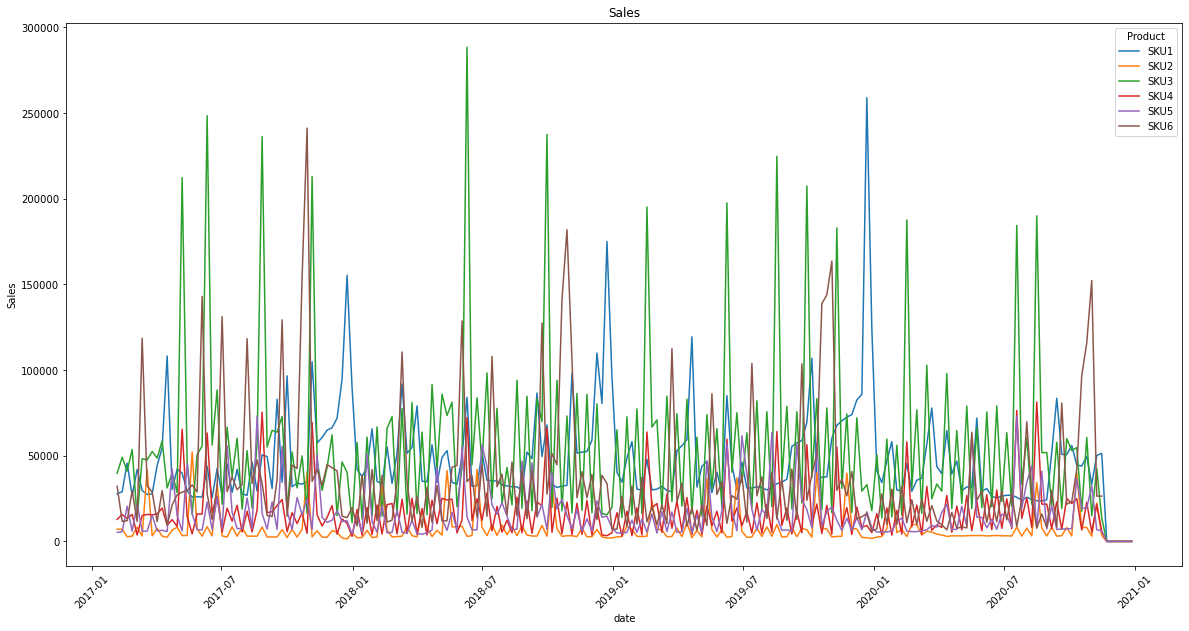

In [11]:
#overall distribution for each product sales
plt.figure(figsize = (20,10))
g=sns.lineplot(x="date",y="Sales",hue="Product",data=df)
g.set_title("Sales")
plt.xticks(rotation=45)
plt.show()

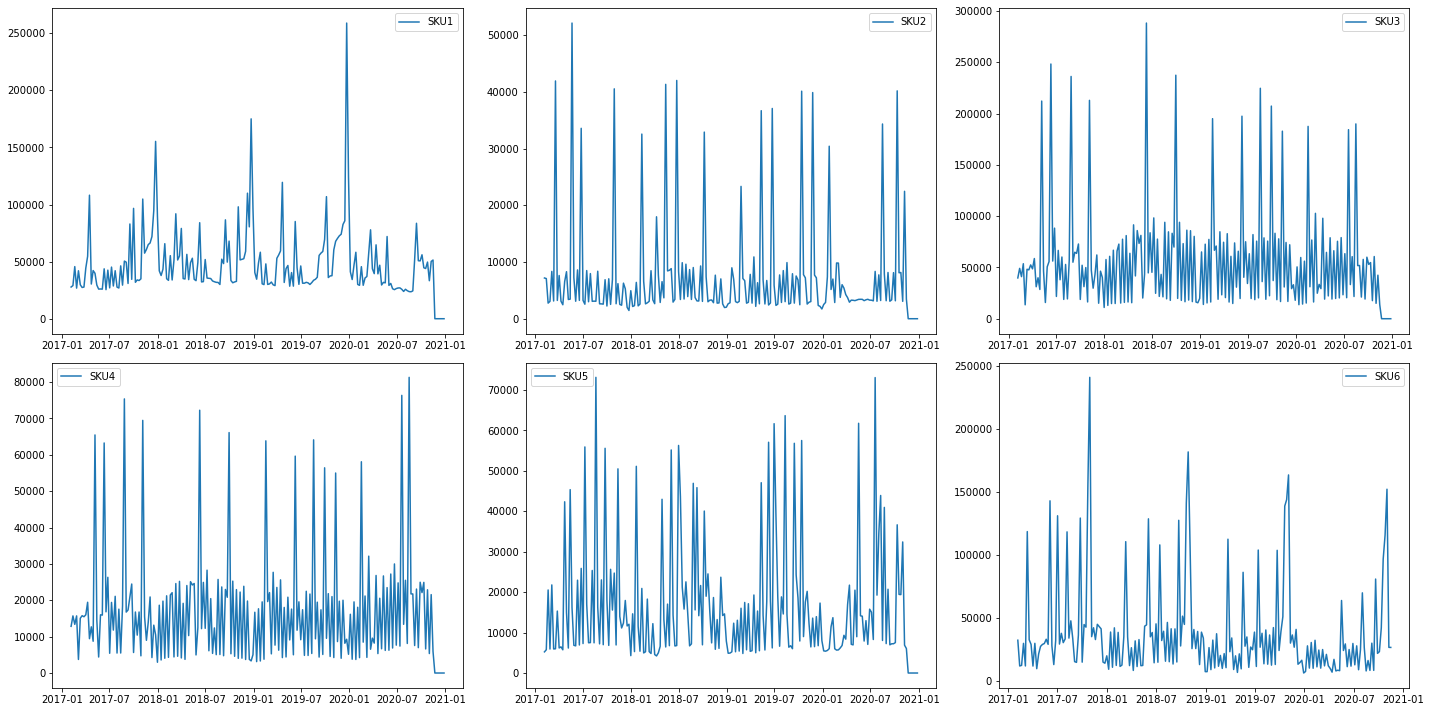

In [12]:
products = df["Product"].unique()

fig, axs = plt.subplots(2, 3, figsize=(20, 10))
axs = axs.ravel()

for i, product in enumerate(products):
    axs[i].plot(df[df["Product"]==product]["date"], df[df["Product"]==product]["Sales"], label=product)
    axs[i].legend()
        
plt.tight_layout()
plt.show()

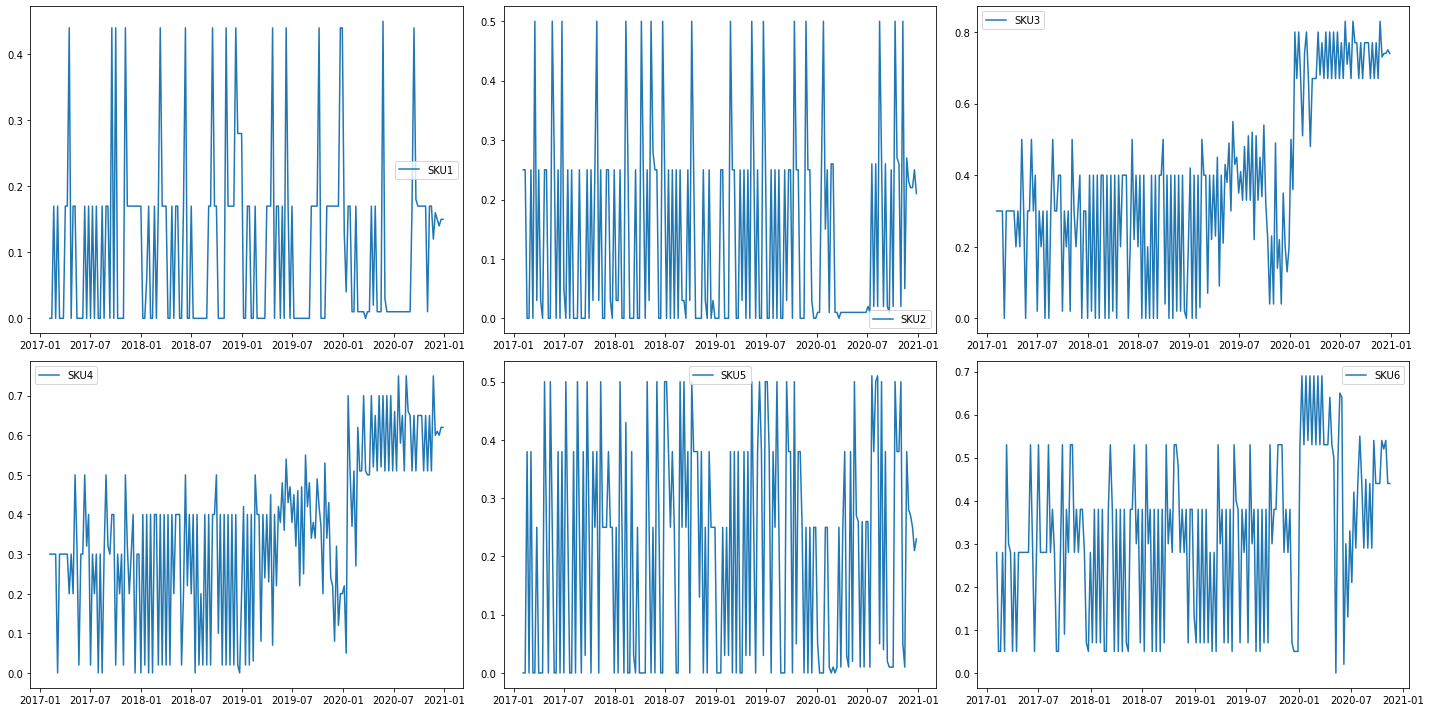

In [13]:
products = df["Product"].unique()

fig, axs = plt.subplots(2, 3, figsize=(20, 10))
axs = axs.ravel()

for i, product in enumerate(products):
    axs[i].plot(df[df["Product"]==product]["date"], df[df["Product"]==product]["discount"], label=product)
    axs[i].legend()
        
plt.tight_layout()
plt.show()

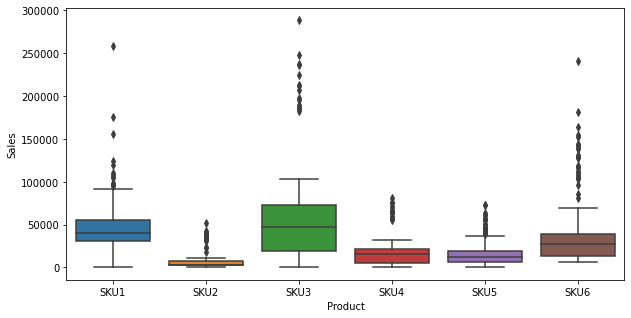

In [14]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Product', y='Sales', data=df)
plt.show()

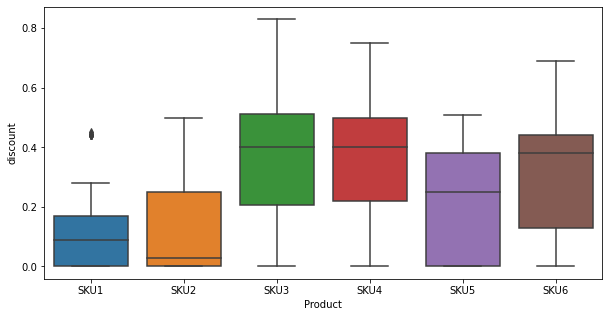

In [15]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Product', y='discount', data=df)
plt.show()

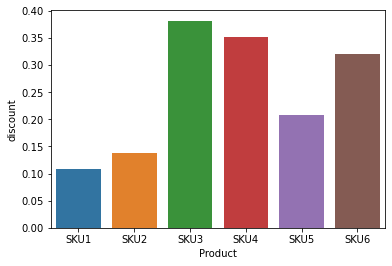

In [28]:
dp = pd.DataFrame(df.groupby(["Product"])["discount"].mean())
sns.barplot(data=dp,x=dp.index,y='discount')
plt.show()

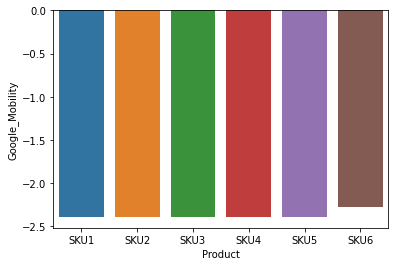

In [29]:
gp = pd.DataFrame(df.groupby(["Product"])["Google_Mobility"].mean())
sns.barplot(data=gp,x=dp.index,y='Google_Mobility')
plt.show()

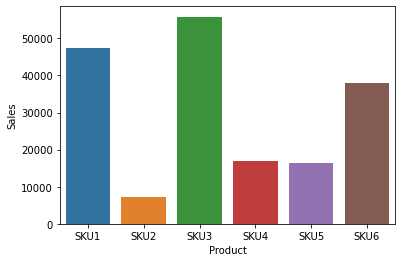

In [44]:
spd = pd.DataFrame(df.groupby(["Product","day_week"])["Sales"].mean())
spd1 = spd.reset_index()
sns.barplot(data=spd1,x='Product',y='Sales')
plt.show()

In [92]:
spm = pd.DataFrame(df.groupby(["Product","month"])["Sales"].sum().sort_values(ascending=False))
spm1 = spm.reset_index()
spm1['max Sales']=spm1.groupby(['Product'])['Sales'].transform(max)
spm1 = spm1[spm1['Sales'] == spm1['max Sales']].reset_index(drop=True)

spm1

,Product,month,Sales,max Sales
0,SKU1,12,1623843,1623843
1,SKU6,10,1566017,1566017
2,SKU3,6,1474162,1474162
3,SKU5,7,453604,453604
4,SKU4,8,424170,424170
5,SKU2,10,222904,222904


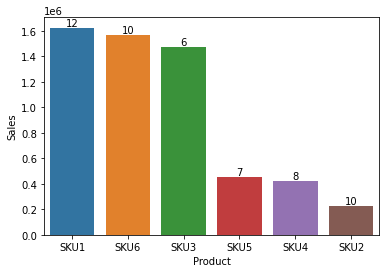

In [96]:
for i in range(len(spm1)):
    word = spm1.loc[i, "month"]
    y = spm1.loc[i, "Sales"]
    plt.annotate(word, (i, y), ha="center", va="bottom")

sns.barplot(data=spm1,x='Product',y='Sales')
plt.show()

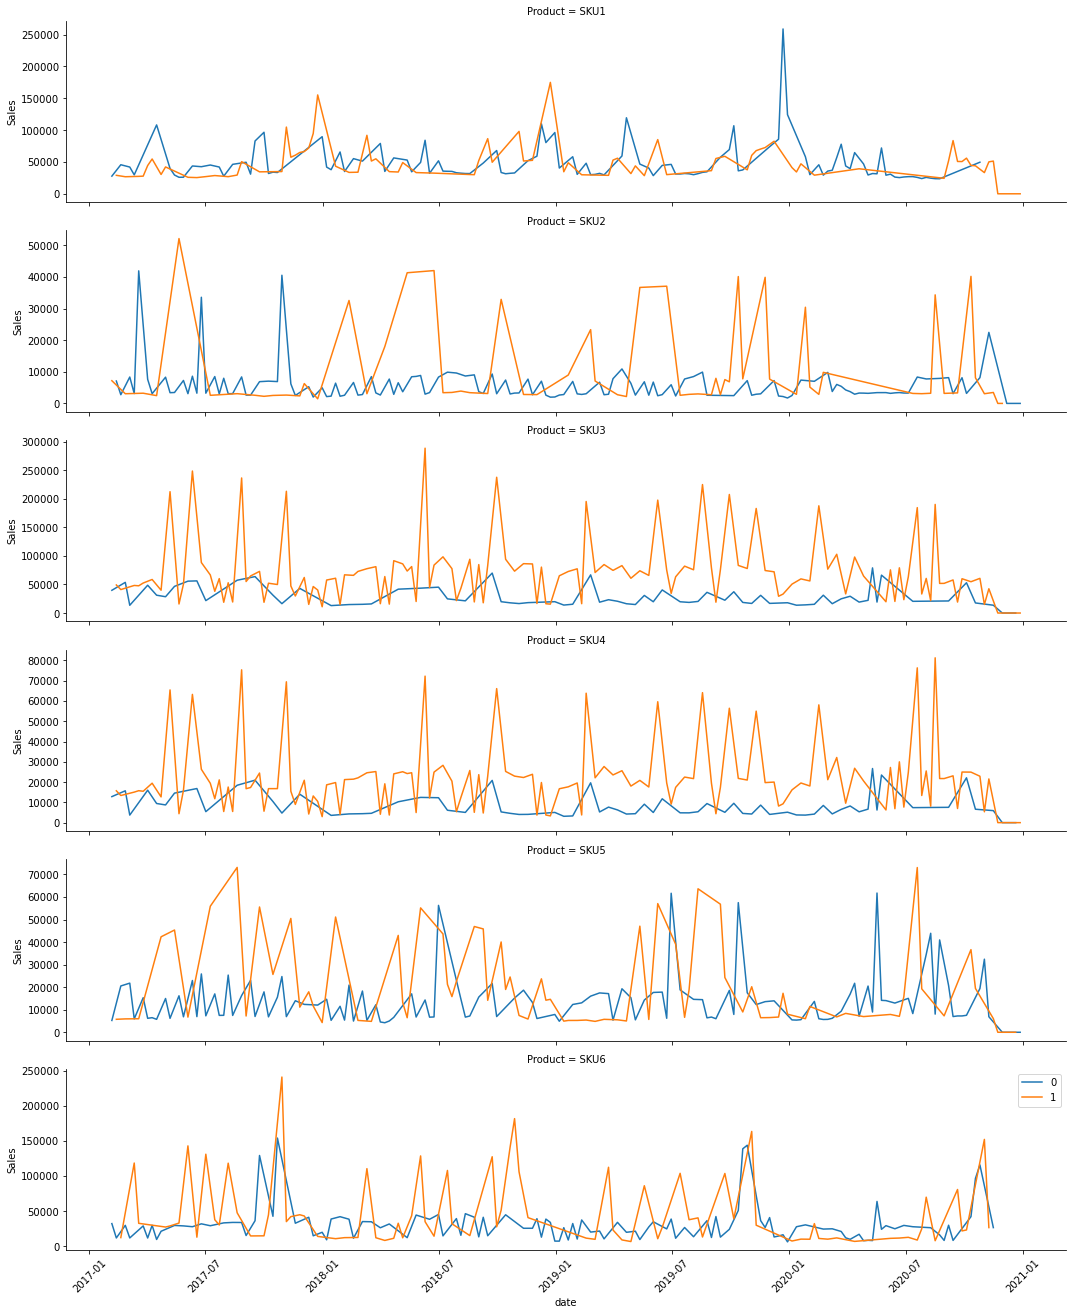

In [20]:
g = sns.FacetGrid(df,hue="In-Store Promo",row="Product",aspect=5, sharey=False)
g.map(sns.lineplot,"date","Sales")
plt.xticks(rotation=45)
plt.legend(loc="upper right")
plt.show()

**Accordiing to EDA, our group made the following recommendations:**

1) At product level, it is evident that SKU1, SKU3, and SKU6 are the top three products that generate major sales amount for the company. So we will recommend the company should put their main sources to produce those three products.

2) Via plotting out the sales by each product and by year, the pattern seems overlapping. Peaks appear mainly in the summer times. And for SKU1, it has its uniqe seasonal pattern. The peak happened majorly at the end of a year. By further exploration, SKU1 has less degree of discount than the others. Thus, for customers, the demand is relatively inelastic. For SKU1, we recommend there should be no discount from February to December and a small discount percentage in January.

3) For SKU3, we shall see that March is the month when the sales is the highest. Also, SKU3 has a relatively large range of discount. Therefore, for SKU3, the company can put heavier discount on SKU3 product in March. SKU6 can have the same strategy as they show similar charateristics.